# Hypotheis 1

This notebook concerns results of experiments for testing the first hypothesis of the work:

** H1 **:  There are user and item features (meta-features) that can predict which recommender system will perform best.

Currently we have the following features for predicting which recommender will perform best:

* fwls_feature_4: The log of the number of distinct dates on which a user has rated movies
* fwls_feature_6: The log of the number of user ratings
* fwls_feature16: The standard deviation of the user ratings
* fwls_feature24: The (regularized) average number of movie ratings for the movies rated by the user

## The  dataset

dataset = (X,y)  = (user features,best RS on average for each user)


In [5]:
require("ggplot2")
h1_df = read.csv("/home/guz/personal/msc-gustavo-penha/data/created/hypothesis1_df.csv")
h1_df[0:10,]

Loading required package: ggplot2


userId,abnormality,abnormalityCR,avgRatingValue,fwls_feature16,fwls_feature24,fwls_feature_4,fwls_feature_6,moviesAvgRatings,moviesPopularity,ratingStdDeviation,support,label
1,0.4365607,0.02827680,3.709524,0.3520609,0.00000000,4.644391,4.653960,3.575774,8526.429,0.3520609,105,FactorWiseMatrixFactorization
2,0.9407234,0.12072147,4.055556,1.0404517,0.00000000,2.564949,3.583519,3.416190,8092.389,1.0404517,36,FactorWiseMatrixFactorization
3,0.8893590,0.10461716,4.125000,0.9214657,0.00000000,4.158883,4.718499,3.499334,8922.491,0.9214657,112,SlopeOne
4,0.5741786,0.03758394,3.562500,0.6291529,0.00000000,2.639057,2.772589,3.239596,12141.062,0.6291529,16,SigmoidSVDPlusPlus
5,0.9438460,0.09992512,4.179487,1.0226847,0.00000000,2.944439,3.663562,3.689300,17630.821,1.0226847,39,BiPolarSlopeOne
6,0.9464752,0.12476914,3.642857,1.2157393,0.00000000,1.609438,2.639057,3.422874,12499.571,1.2157393,14,SigmoidSVDPlusPlus
7,0.6479153,0.06325902,3.303030,0.8654918,0.00000000,4.595120,5.105945,3.426382,7499.061,0.8654918,165,FactorWiseMatrixFactorization
8,0.7389987,0.06969918,3.809524,1.0178431,0.02380952,3.332205,3.737670,3.453408,17474.333,1.0178431,42,CoClustering
9,0.8051727,0.09903351,2.952381,1.2440334,0.00000000,2.833213,3.044522,3.167442,7374.857,1.2440334,21,FactorWiseMatrixFactorization
10,0.4175544,0.02748865,3.909091,0.5263614,0.00000000,2.484907,3.091042,3.870862,15552.091,0.5263614,22,FactorWiseMatrixFactorization


We can see from the plot below that recommenders make different errors, where the best RS varies for (userId,itemId) tuples,

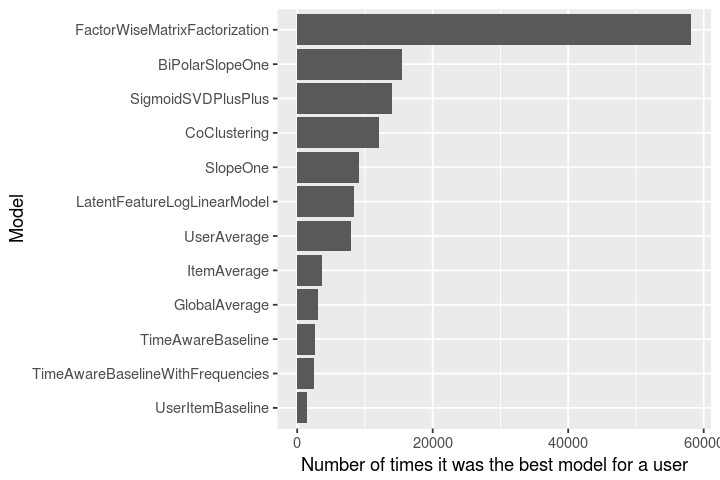

In [6]:
options(repr.plot.width=6, repr.plot.height=4)
h1_df <- within(h1_df, label <- factor(label, levels=names(sort(table(label))))) # sort
ggplot(h1_df,aes(x=label)) + geom_bar() + coord_flip() + xlab("Model")+ ylab("Number of times it was the best model for a user")

## Analysing results from best classifier

Using X0 as id variables


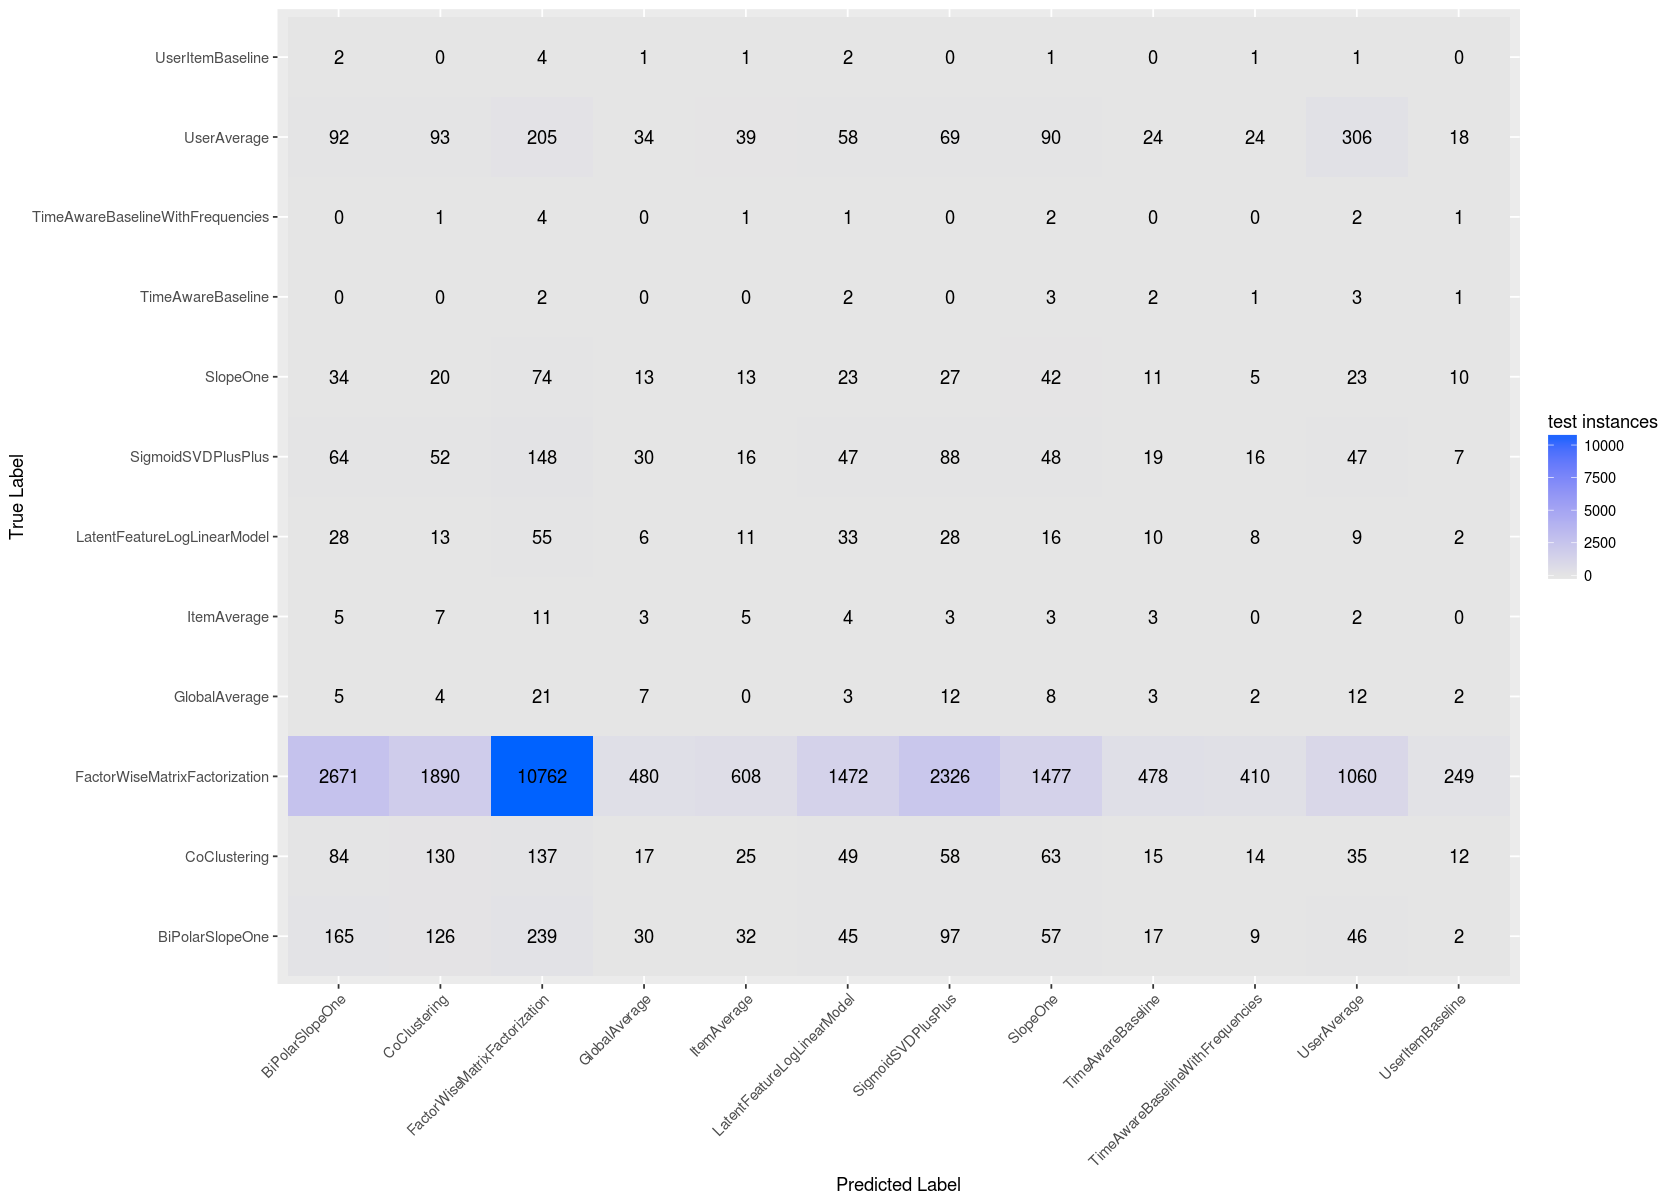

In [7]:
## Best classifier confusion matrix

options(repr.plot.width=14, repr.plot.height=10)
library(reshape2)
cm_df = read.csv("/home/guz/personal/msc-gustavo-penha/data/created/switching_approach_cm.csv")
melted = melt(cm_df)
ggplot(data = melted, aes(x=reorder(X0,-value), y=reorder(variable,-value), fill=value)) + 
  geom_tile() + 
  geom_text(aes(label = round(value, 1))) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))+
  scale_fill_gradient("test instances",low = "#e5e5e5", high = "#0062ff") + 
  scale_x_discrete(limits=cm_df$X0[order(cm_df$X0)])+
  scale_y_discrete(limits=cm_df$X0[order(cm_df$X0)]) + xlab("Predicted Label")+ ylab("True Label")

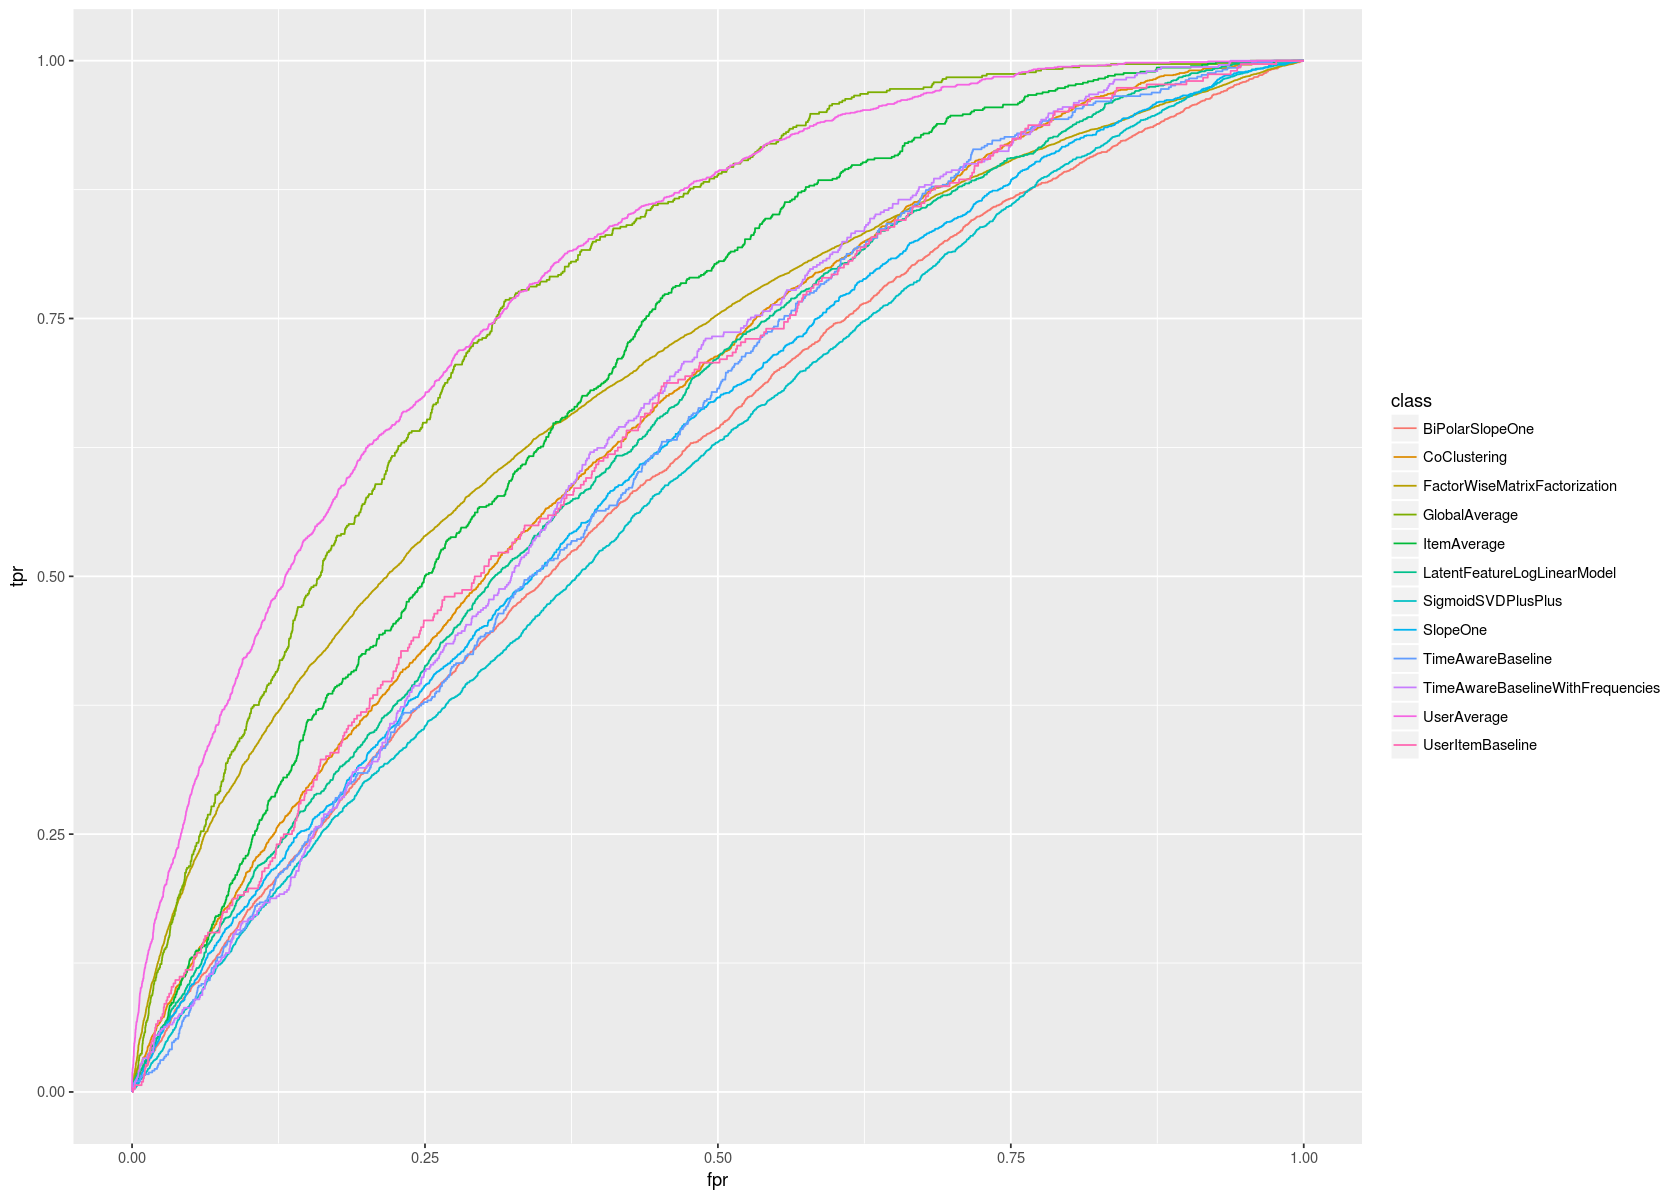

In [8]:
## Best classifier AUC curve
rocs_df = read.csv("/home/guz/personal/msc-gustavo-penha/data/created/switching_approach_rocs.csv")
ggplot(rocs_df,aes(x=fpr,y=tpr,color=class)) + geom_line()
# ggplot(rocs_df,aes(x=fpr,y=tpr,color=class)) + geom_line() +ylim(0.8,1) + xlim(0,0.1)

In [5]:
## Gives count, mean, standard deviation, standard error of the mean, and confidence interval (default 95%).
##   data: a data frame.
##   measurevar: the name of a column that contains the variable to be summariezed
##   groupvars: a vector containing names of columns that contain grouping variables
##   na.rm: a boolean that indicates whether to ignore NA's
##   conf.interval: the percent range of the confidence interval (default is 95%)
summarySE <- function(data=NULL, measurevar, groupvars=NULL, na.rm=FALSE,
                      conf.interval=.95, .drop=TRUE) {
    library(plyr)

    # New version of length which can handle NA's: if na.rm==T, don't count them
    length2 <- function (x, na.rm=FALSE) {
        if (na.rm) sum(!is.na(x))
        else       length(x)
    }

    # This does the summary. For each group's data frame, return a vector with
    # N, mean, and sd
    datac <- ddply(data, groupvars, .drop=.drop,
      .fun = function(xx, col) {
        c(N    = length2(xx[[col]], na.rm=na.rm),
          mean = mean   (xx[[col]], na.rm=na.rm),
          sd   = sd     (xx[[col]], na.rm=na.rm)
        )
      },
      measurevar
    )

    # Rename the "mean" column    
    datac <- rename(datac, c("mean" = measurevar))

    datac$se <- datac$sd / sqrt(datac$N)  # Calculate standard error of the mean

    # Confidence interval multiplier for standard error
    # Calculate t-statistic for confidence interval: 
    # e.g., if conf.interval is .95, use .975 (above/below), and use df=N-1
    ciMult <- qt(conf.interval/2 + .5, datac$N-1)
    datac$ci <- datac$se * ciMult

    return(datac)
}

notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.


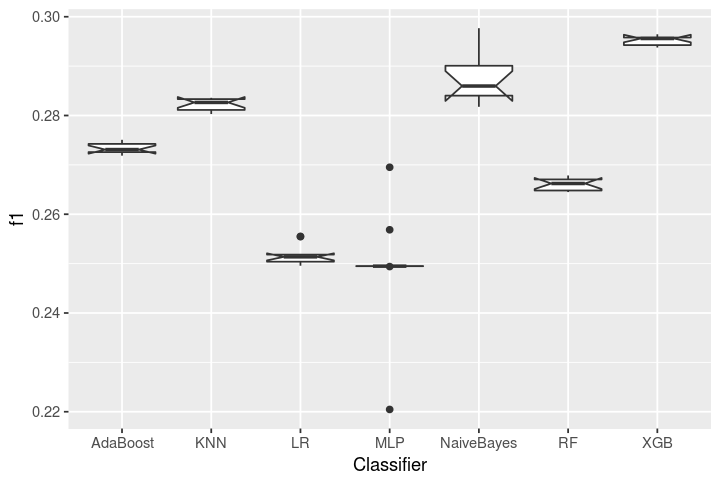

In [10]:
# F1 measure for folds.
options(repr.plot.width=6, repr.plot.height=4)
f1_df = read.csv("/home/guz/personal/msc-gustavo-penha/data/created/switching_approach_results.csv")
ggplot(f1_df,aes(x=Classifier,y=f1))+geom_boxplot(notch=TRUE)

Classifier,N,f1,sd,se,ci
AdaBoost,10,0.2733831,0.001146448,0.0003625388,0.0008201198
KNN,10,0.2822457,0.001262344,0.0003991884,0.0009030268
LR,10,0.2518182,0.002075003,0.0006561735,0.0014843676
MLP,10,0.2493177,0.012006967,0.0037969364,0.0085892670
NaiveBayes,10,0.2875314,0.005184475,0.0016394750,0.0037087500
RF,10,0.2660543,0.001253498,0.0003963910,0.0008966987
XGB,10,0.2951616,0.000959183,0.0003033203,0.0006861582


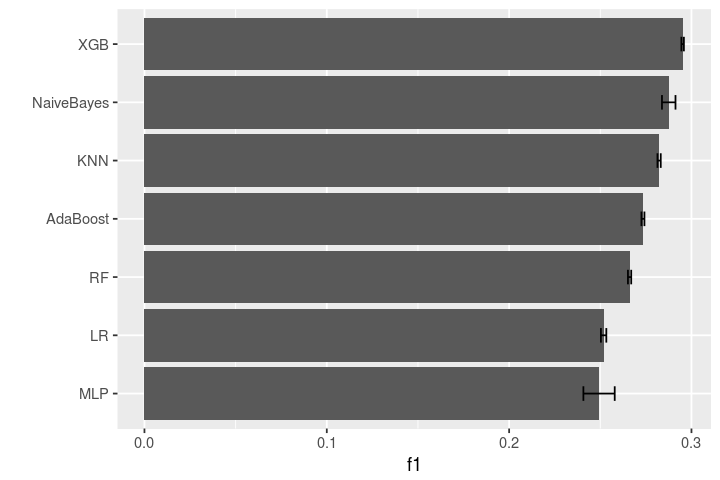

In [14]:
tgc <- data.frame(summarySE(f1_df, measurevar="f1",groupvars = "Classifier"))
tgc
ggplot(tgc, aes(x=reorder(Classifier,f1), y=f1)) + geom_bar(stat="identity") + 
geom_errorbar(position=position_dodge(.9), width=.25, aes(ymin=f1-ci, ymax=f1+ci)) +coord_flip()+xlab("")

In [12]:
pvalues = pairwise.t.test(f1_df$f1, f1_df$Classifier, p.adjust = "none")$p.value
pvalues = format(pvalues, digits=2) 
pvalues

,AdaBoost,KNN,LR,MLP,NaiveBayes,RF
KNN,2.4e-04,NA,NA,NA,NA,NA
LR,9.3e-14,4.3e-20,NA,NA,NA,NA
MLP,1.3e-15,1.0e-21,2.8e-01,NA,NA,NA
NaiveBayes,4.4e-08,2.3e-02,1.8e-23,5.6e-25,NA,NA
RF,2.0e-03,1.2e-09,3.8e-08,4.6e-10,1.1e-13,NA
XGB,6.4e-14,3.6e-07,7.3e-28,3.5e-29,1.3e-03,3.4e-19


In [9]:
data.frame(pairwise.wilcox.test(f1_df$f1, f1_df$Classifier, p.adjust = "none")$p.value)

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”

,AdaBoost,KNN,LR,MLP,NaiveBayes,RF
KNN,1.082509e-05,NA,NA,NA,NA,NA
LR,1.082509e-05,1.082509e-05,NA,NA,NA,NA
MLP,1.630489e-04,1.630489e-04,2.464330e-02,NA,NA,NA
NaiveBayes,1.082509e-05,1.504687e-03,1.082509e-05,0.0001630489,NA,NA
RF,1.082509e-05,1.082509e-05,1.082509e-05,0.0026243172,1.082509e-05,NA
XGB,1.082509e-05,1.082509e-05,1.082509e-05,0.0001630489,3.886207e-03,1.082509e-05


## Comparing the predictions

First we will combine all results in one dataframe and them we will visualize the results

In [1]:
best_df = read.csv("/home/guz/personal/msc-gustavo-penha/data/created_17/predictions_BiasedMatrixFactorization_with_errors.csv")
best_df[0:10,]

userId,movieId,prediction_BiasedMatrixFactorization,rating,timestamp,error_BiasedMatrixFactorization
1,5171,3.749792,4.0,1112486104,0.250208
1,6093,3.759789,4.0,1112485713,0.240211
1,1196,4.286079,4.5,1112484742,0.213921
1,3479,3.780811,4.0,1112485734,0.219189
1,593,4.041842,3.5,1112484661,0.541842
1,3996,4.000338,4.0,1094785727,0.000338
1,4105,3.865606,3.5,1094786104,0.365606
1,541,3.954669,4.0,1112484603,0.045331
1,2173,3.718326,4.0,1112485887,0.281674
1,7164,4.063289,3.5,1112485923,0.563289


In [2]:
preds = read.csv("/home/guz/personal/msc-gustavo-penha/data/created/switching_predictions.csv")
preds_df = merge(best_df,preds,by=c("movieId","userId"))
names(preds_df)[names(preds_df) == 'prediction'] <- 'prediction_switching'
preds_df["error_switching"] = abs(preds_df["prediction_switching"] - preds_df["rating"])
preds_df[0:10,]

movieId,userId,prediction_BiasedMatrixFactorization,rating,timestamp,error_BiasedMatrixFactorization,prediction_switching,error_switching
100008,27053,2.639630,3.0,1358922494,0.360370,2.745164,0.254836
100008,51558,3.071274,3.0,1422833166,0.071274,3.194750,0.194750
100010,106476,3.130507,2.5,1420774929,0.630507,3.199735,0.699735
100010,12131,1.942971,1.5,1398369060,0.442971,2.188177,0.688177
100010,127063,2.259258,3.0,1416758994,0.740742,2.080015,0.919985
1000,101282,2.246842,1.5,1053916995,0.746842,2.338880,0.838880
100010,135806,2.306104,3.0,1375739179,0.693896,2.544694,0.455306
100010,20180,2.623380,1.0,1424294683,1.623380,2.543358,1.543358
100010,24994,3.509788,4.0,1424470787,0.490212,3.892840,0.107160
1000,102636,3.552857,3.0,968637191,0.552857,3.385994,0.385994


In [3]:
# preds_oracle = read.csv("/home/guz/personal/msc-gustavo-penha/data/created/switching_predictions_oracle.csv")
# # preds_df = merge(preds_df,preds_oracle,by=c("movieId","userId"))
# preds_df = merge(best_df,preds_oracle,by=c("movieId","userId"))
# names(preds_df)[names(preds_df) == 'prediction'] <- 'prediction_oracle'
# preds_df["error_oracle"] = abs(preds_df["prediction_oracle"] - preds_df["rating"])
# preds_df[0:10,]

In [12]:
tgc1 <- summarySE(preds_df, measurevar="error_BiasedMatrixFactorization")
tgc2 <- summarySE(preds_df, measurevar="error_switching")
tgc3 <- summarySE(preds_df, measurevar="error_oracle")

comparison= data.frame(mae = c(mean(preds_df[["error_switching"]]),0.579,mean(preds_df[["error_BiasedMatrixFactorization"]])),model = c("switching","oracle","best_single"),
                       ci = c(tgc2$ci,0.00032,tgc1$ci))
comparison

Warning message in mean.default(xx[[col]], na.rm = na.rm):
“argument is not numeric or logical: returning NA”Warning message in qt(conf.interval/2 + 0.5, datac$N - 1):
“NaNs produzidos”

mae,model,ci
0.6024157,switching,0.0003647276
0.5790000,oracle,0.0003200000
0.6055113,best_single,0.0003575731


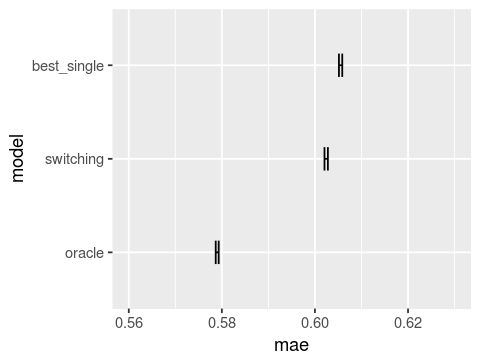

In [13]:
require(ggplot2)
options(repr.plot.width=4, repr.plot.height=3)
ggplot(comparison, aes(x=reorder(model,mae),y=mae)) + 
# geom_bar(stat="identity",alpha=0.8) + 
geom_errorbar(position=position_dodge(.9), width=.25, aes(ymin=mae-ci, ymax=mae+ci)) + 

# TODO put golden color in oracle
# color = factor(model)
#     scale_color_manual("Stress", breaks=c(1,2,3,4),values=c("#002B2", "#009E73", "#E69F00", "#D55E00"))+
ylim(0.56,0.63) + coord_flip() + xlab("model")